In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pickle

# Read the CSV file
stars = pd.read_csv("data/Stars.csv")
stars_original = pd.read_csv("data/Stars.csv")

# Select columns with float64 data type
stars = stars.select_dtypes(include='float64')

# Remove specific columns & Empty Rows
columns_to_remove = []
stars = stars.drop(columns=columns_to_remove)
stars = stars.dropna()

# Include the "Species" column from the original sheet
species_column = stars_original['Species']
stars = pd.concat([stars, species_column], axis=1)

print(stars)

KeyError: 'Species'

In [4]:
d = {'Adelie Penguin (Pygoscelis adeliae)': 0, 'Chinstrap penguin (Pygoscelis antarctica)': 1, 'Gentoo penguin (Pygoscelis papua)': 2}
stars['Species'] = stars['Species'].map(d)


stars.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


In [5]:
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

X = stars[features]
y = stars['Species']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

print(X)
print(y)

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)
0                  39.1               18.7                181.0         3750.0
1                  39.5               17.4                186.0         3800.0
2                  40.3               18.0                195.0         3250.0
4                  36.7               19.3                193.0         3450.0
5                  39.3               20.6                190.0         3650.0
..                  ...                ...                  ...            ...
341                49.6               18.2                193.0         3775.0
342                50.8               19.0                210.0         4100.0
343                50.2               18.7                198.0         3775.0
3                   NaN                NaN                  NaN            NaN
271                 NaN                NaN                  NaN            NaN

[344 rows x 4 columns]
0      0
1      0
2      0
4

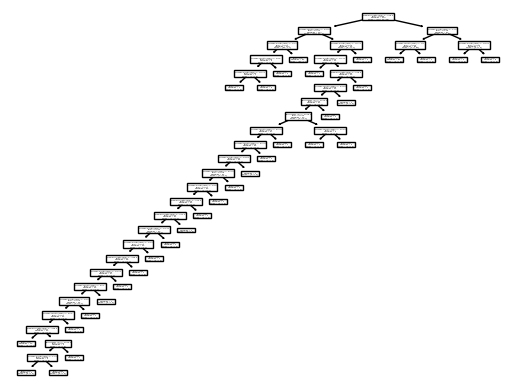

In [9]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

tree.plot_tree(dtree, feature_names=features)

# Save the figure to a file
plt.savefig('stars_plot.png', dpi=300, format='png')


	39.5	17.4	186.0	3800.0	0 -> Adelie Penguin

In [10]:
print(dtree.predict([[39.5, 17.4, 186.0, 3800.0]]))

[0]


C:\Users\kaspe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
#Predict the response for test dataset
y_pred = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9519230769230769


In [13]:
pickle.dump(dtree , open('penguin_model' , 'wb'))